# 逻辑回归 

逻辑回归（Logistic Regression），虽然名字里有 “回归” 二字，但实际上是解决分类问题的一类线性模型。又被称作 logit 回归，maximum-entropy classification（MaxEnt，最大熵分类），或 log-linear classifier（对数线性分类器）。

逻辑回归它基于线性回归模型，通过一个非线性的逻辑函数（称为“sigmoid函数”或“逻辑函数”）将预测结果映射到概率值，从而对样本进行分类。数学模型如下：

$hθ(x) = g(θ^T x)$ ，其中 $g(z) = \frac{1}{1 + e^{-z}} $ 是逻辑函数。

## sigmoid函数
函数表达式为：

$
f(x) = \frac{1}{1 + e^{-x}}
$

我们用代码将这个函数绘制出来：

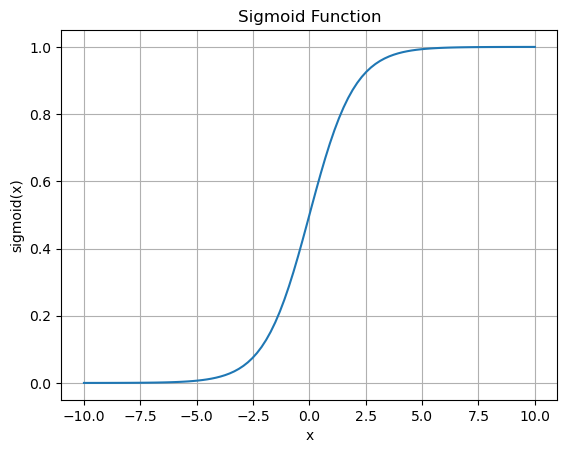

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 生成一系列x值
x = np.linspace(-10, 10, 100)

# 计算对应的sigmoid值
y = sigmoid(x)

# 绘制sigmoid函数曲线
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

这个函数图像看着就很对称，也很优雅。记为$f(x) = \frac{1}{1 + e^{-x}}$

对这个函数求导为：

$f’(x) = \frac{d}{dx} \left(\frac{1}{1 + e^{-x}}\right)$

进一步可以得到（推导略）

$f’(x) = 2f(x)(1 - f(x))$

换句话说，sigmoid函数的导数值，仅仅依靠该函数值本身的四则运算就可以计算得到，计算可谓是非常简便。


## 损失函数（Loss Function）：

参考[1]

我们知道一个样本最终的计算值在 $(0,1)$ 之间浮动，可以被视作概率值。并且由于sigmoid函数的单调性，我们可以认为，概率值越接近1，说明样本越接近正样本，评价质量越好

因此，我们可以构造一个似然函数，它衡量了计算得分值和真实样本标签之间的差距，当样本只有一个的时候：

$L(w) = (p(x))^y (1-p(x))^{(1-y)}$

当样本有N个的时候

$L(w) = \prod_{i=0}^{n} (p(x_i))^y_i (1-p(x_i))^{(1-y_i)}$

再考虑到该函数的连乘，也未对样本的数量做归一化，应当转换成

$J(w) = -\frac{1}{N} \ln L(w)$

加上L2正则化项为：

$
J(w) = -\frac{1}{N} \ln L(w) + \frac{\lambda}{2N}\sum_{j=1}^{m} w_j^2
$

其中，$J(w)$ 是目标函数，$w$ 是模型的参数向量，$N$ 是训练样本数量，$w_j$ 是第 $j$ 个特征的权重，$λ$ 是正则化参数，$m$ 是参数个数。


下面演示一个逻辑回归分类的示例：

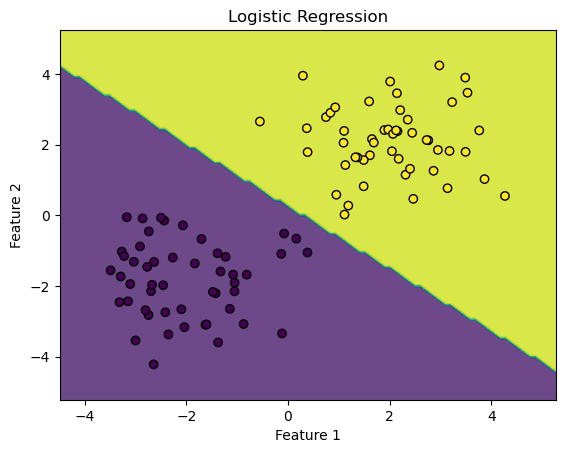

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 创建一些随机数据用于训练
np.random.seed(0)
X1 = np.random.randn(50, 2) + [2, 2]
X2 = np.random.randn(50, 2) + [-2, -2]
X = np.concatenate((X1, X2))
y = np.concatenate((np.ones(50), np.zeros(50)))

# 训练逻辑回归模型
model = LogisticRegression()
model.fit(X, y)

# 可视化分类结果
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')
plt.show()

## 参考

[1] 逻辑回归 https://zhuanlan.zhihu.com/p/580207932?utm_id=0